In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


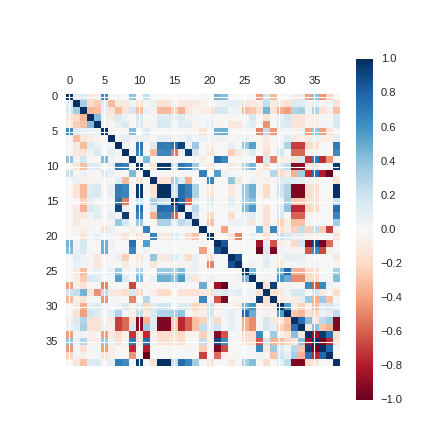

0                      correct
1                           RT
2                      entropy
3                   is_correct
4             is_correct_ideal
5                     response
6                   trial_time
7                  abs_dot_x_4
8                  abs_dot_y_4
9              correct_ideal_4
10                  dot_dist_4
11                     dot_x_4
12                     dot_y_4
13        momentary_surprise_4
14    momentary_surprise_pc1_4
15    momentary_surprise_pc2_4
16      momentary_surprise_x_4
17      momentary_surprise_y_4
18                 move_dist_4
19                    move_x_4
20                    move_y_4
21                 sum_dot_x_4
22            sum_dot_x_prev_4
23                 sum_dot_y_4
24            sum_dot_y_prev_4
25           support_correct_4
26    support_previous_ideal_4
27                     accev_4
28               accev_cflip_4
29                 accev_pca_4
30                accsur_pca_4
31               dot_x_cflip_4
32      

In [12]:
subjects = 2
dots = 4

DM = subject_DM.get_trial_DM(dots, subjects, r_names='all')
img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


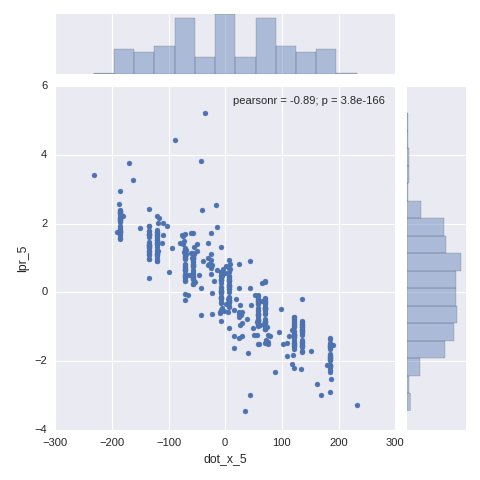

In [4]:
sns.jointplot('dot_x_5', 'lpr_5', data=DM);

<IPython.core.display.Javascript object>


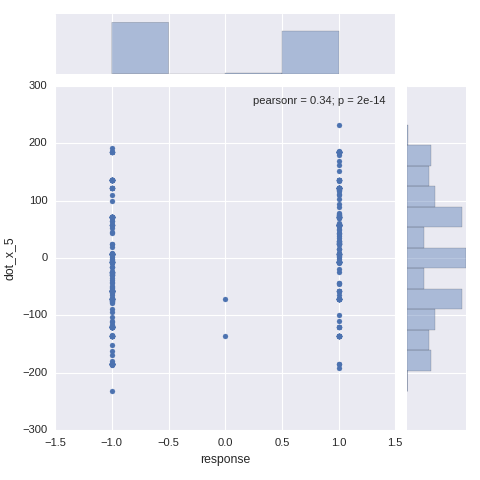

In [7]:
sns.jointplot('response', 'dot_x_5', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


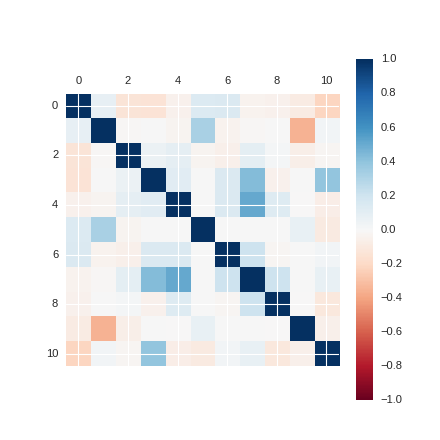

0              entropy
1             response
2           trial_time
3          abs_dot_x_3
4          abs_dot_y_3
5              dot_x_3
6              dot_y_3
7          move_dist_3
8     sum_dot_y_prev_3
9              accev_3
10       dot_x_cflip_3
dtype: object

In [5]:
dots = 3
DM_lowr = subject_DM.get_trial_DM(dots, subjects, r_names=
        ['dot_x', 'dot_y', 'accev', 'sum_dot_y_prev', 'abs_dot_x', 
         'abs_dot_y', 'move_dist', 'entropy', 'trial_time', 'response',
         'dot_x_cflip'])
img = sns.plt.matshow(DM_lowr.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM_lowr.columns)

### Checking correlation of these regressors across all subjects

In [30]:
dots = np.arange(1, 6)
DM_all = subject_DM.get_trial_DM(dots, r_names=
        ['dot_x', 'dot_y', 'sum_dot_x', 'sum_dot_y', 'entropy', 'trial_time', 'response'])
corrs = pd.concat([DM_all.loc[sub].corr() for sub in DM_all.index.levels[0]],
                  keys=DM_all.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
corrs.describe()

,entropy,response,trial_time,dot_x_1,dot_y_1,sum_dot_x_1,sum_dot_y_1,dot_x_2,dot_y_2,sum_dot_x_2,...,sum_dot_x_3,sum_dot_y_3,dot_x_4,dot_y_4,sum_dot_x_4,sum_dot_y_4,dot_x_5,dot_y_5,sum_dot_x_5,sum_dot_y_5
count,792.000000,792.000000,792.000000,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.920000e+02,7.920000e+02,7.920000e+02,...,7.920000e+02,7.920000e+02,792.000000,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02
mean,-0.006406,0.154486,-0.000875,1.222461e-01,9.439756e-02,1.222461e-01,9.439756e-02,1.179227e-01,1.063792e-01,2.132686e-01,...,2.405667e-01,2.153474e-01,0.068787,1.660794e-02,2.504344e-01,2.275645e-01,1.017403e-01,1.131287e-02,2.493166e-01,2.166627e-01
std,0.102053,0.200034,0.044724,2.277423e-01,2.585562e-01,2.277423e-01,2.585562e-01,2.046640e-01,2.309731e-01,3.114072e-01,...,3.123571e-01,3.367840e-01,0.147081,1.509748e-01,3.062056e-01,3.123722e-01,1.703370e-01,1.705242e-01,2.992456e-01,2.792778e-01
min,-0.537569,-0.240831,-0.154099,-2.146814e-01,-2.545915e-01,-2.146814e-01,-2.545915e-01,-1.942528e-01,-1.513824e-01,-2.839038e-01,...,-4.141293e-01,-1.182939e-01,-0.176235,-1.758232e-01,-4.339946e-01,-9.635917e-02,-4.242416e-01,-2.681791e-01,-5.375686e-01,-6.697317e-02
25%,-0.045465,-0.007916,-0.031166,-2.359307e-18,-4.466571e-17,-2.359307e-18,-4.466571e-17,-1.570560e-18,-1.912242e-17,-4.466571e-17,...,-7.154007e-18,-2.942589e-17,0.000000,-4.121903e-02,-6.921113e-18,-6.271737e-19,-5.536885e-18,-1.482444e-02,1.918467e-18,-1.996658e-18
50%,-0.000975,0.040177,0.000504,2.398630e-17,-2.359307e-18,2.398630e-17,-2.359307e-18,8.119844e-17,7.847994e-18,0.000000e+00,...,2.190991e-04,1.592773e-17,0.003583,-1.185088e-17,4.176617e-17,1.188884e-17,4.043471e-03,7.695095e-18,3.876916e-03,2.647863e-04
75%,0.047077,0.320937,0.030486,1.260788e-01,3.046899e-02,1.260788e-01,3.046899e-02,1.335850e-01,1.787990e-01,5.717189e-01,...,5.681798e-01,5.992628e-01,0.065248,4.176617e-17,4.861703e-01,5.207690e-01,1.335850e-01,2.616826e-02,4.569111e-01,4.385403e-01
max,0.342267,0.677614,0.157394,7.634810e-01,7.995373e-01,7.634810e-01,7.995373e-01,6.758847e-01,7.338944e-01,7.634810e-01,...,8.574899e-01,8.698548e-01,0.561641,4.385403e-01,8.574899e-01,8.976933e-01,7.099147e-01,4.994942e-01,8.429461e-01,8.976933e-01


<IPython.core.display.Javascript object>


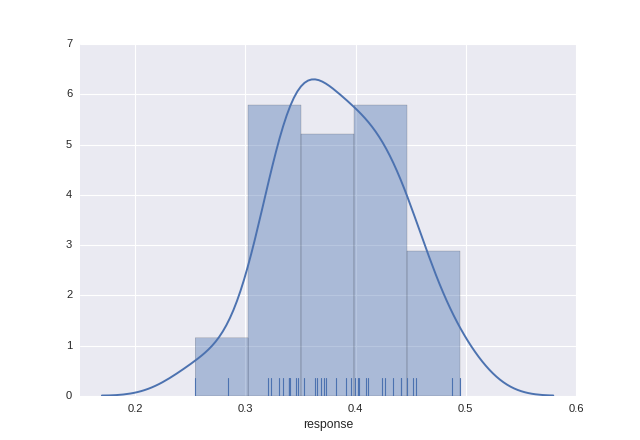

In [9]:
sns.plt.figure()
sns.distplot(corrs.xs('dot_x_5', level='regressor').response, rug=True);

In [34]:
', '.join(['%4.2f' % corrs.xs('dot_x_%d'%i, level='regressor').response.mean() for i in dots])

'0.23, 0.31, 0.28, 0.16, 0.38'

## Checking correlations across dots

<IPython.core.display.Javascript object>


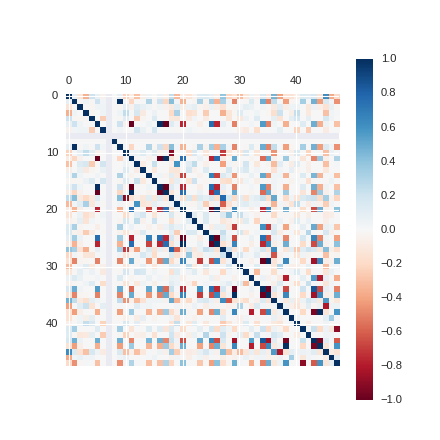

0              entropy
1             response
2           trial_time
3          abs_dot_x_1
4          abs_dot_y_1
5              dot_x_1
6              dot_y_1
7     sum_dot_x_prev_1
8              accev_1
9        accev_cflip_1
10       dot_x_cflip_1
11               lpr_1
12         abs_dot_x_2
13         abs_dot_y_2
14             dot_x_2
15             dot_y_2
16    sum_dot_x_prev_2
17             accev_2
18       accev_cflip_2
19       dot_x_cflip_2
20               lpr_2
21         abs_dot_x_3
22         abs_dot_y_3
23             dot_x_3
24             dot_y_3
25    sum_dot_x_prev_3
26             accev_3
27       accev_cflip_3
28       dot_x_cflip_3
29               lpr_3
30         abs_dot_x_4
31         abs_dot_y_4
32             dot_x_4
33             dot_y_4
34    sum_dot_x_prev_4
35             accev_4
36       accev_cflip_4
37       dot_x_cflip_4
38               lpr_4
39         abs_dot_x_5
40         abs_dot_y_5
41             dot_x_5
42             dot_y_5
43    sum_d

In [8]:
sub = 2
DM = subject_DM.get_trial_DM(dots=[1,2,3,4,5], subjects=sub, r_names=['dot_y', 
            'dot_x', 'accev', 'abs_dot_y', 'abs_dot_x', 'entropy', 'trial_time', 
            'response', 'dot_x_cflip', 'accev_cflip', 'sum_dot_x_prev', 'lpr'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


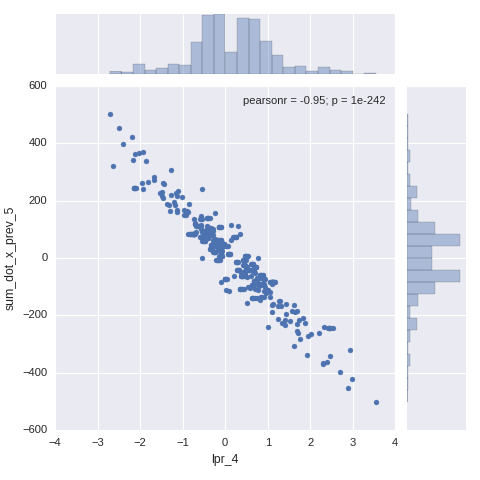

In [11]:
sns.jointplot('lpr_4', 'sum_dot_x_prev_5', data=DM);

### for all subjects

In [8]:
corrs = pd.concat([DM.loc[sub].corr() for sub in DM.index.levels[0]],
                  keys=DM.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
print('overall min=%5.2f, max=%5.2f' % (corrs.min().min(), corrs.max().max()))
corrs.describe()

overall min=-0.35, max= 0.30


,entropy,trial_time,abs_dot_x_1,abs_dot_y_1,dot_x_1,dot_y_1,abs_dot_x_2,abs_dot_y_2,dot_x_2,dot_y_2,...,dot_x_3,dot_y_3,abs_dot_x_4,abs_dot_y_4,dot_x_4,dot_y_4,abs_dot_x_5,abs_dot_y_5,dot_x_5,dot_y_5
count,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,-0.038322,0.019399,-2.400427e-02,3.592842e-03,1.194415e-02,-2.501099e-02,2.046808e-02,1.618733e-02,1.376859e-02,1.127895e-02,...,4.942681e-03,1.880686e-02,5.488472e-03,4.204593e-03,1.542010e-02,-2.754138e-02,-6.667178e-03,2.086518e-03,2.774660e-02,-5.819585e-03
std,0.156923,0.063498,1.326855e-01,1.179278e-01,3.671430e-02,1.181576e-01,1.435456e-01,7.976141e-02,3.617371e-02,1.028585e-01,...,4.100180e-02,1.218147e-01,1.177338e-01,1.176436e-01,2.947517e-02,1.216453e-01,5.216147e-02,1.107370e-01,5.249069e-02,1.301104e-01
min,-0.352669,-0.129165,-3.526687e-01,-2.503053e-01,-6.409052e-02,-2.545915e-01,-2.901665e-01,-1.005136e-01,-4.364428e-02,-1.513824e-01,...,-6.409052e-02,-2.550821e-01,-3.162524e-01,-3.166431e-01,-3.545179e-17,-3.166431e-01,-1.435207e-01,-2.196504e-01,-6.064485e-03,-2.545915e-01
25%,-0.129165,-0.011115,-9.017932e-02,-2.890475e-02,-4.126499e-17,-5.237129e-02,-5.435289e-02,-4.114450e-02,-7.929212e-18,-3.474890e-02,...,-4.206430e-17,-5.253853e-02,-5.181511e-02,-6.399207e-17,-2.242523e-18,-6.232843e-02,-3.474890e-02,-5.461977e-02,-1.185088e-17,-7.342330e-02
50%,-0.042816,0.040450,-1.628555e-17,8.595934e-18,-3.627210e-18,-2.359307e-18,-2.242523e-18,4.401606e-18,1.931669e-17,-1.850109e-17,...,-2.372523e-18,1.911684e-17,-2.327654e-18,2.032243e-02,1.911684e-17,-3.481608e-17,6.679354e-18,1.016020e-17,2.460854e-18,7.695095e-18
75%,0.073251,0.054856,3.938824e-02,9.015700e-02,7.898158e-17,4.092220e-02,1.268761e-01,7.522399e-02,8.119844e-17,4.627690e-02,...,3.130849e-17,1.377822e-01,9.587577e-02,5.991858e-02,5.609059e-03,2.419416e-02,1.017522e-02,5.130292e-02,3.811751e-17,6.447500e-02
max,0.209229,0.126876,2.347850e-01,2.092287e-01,1.260788e-01,1.832887e-01,2.520110e-01,1.714043e-01,1.335850e-01,2.210344e-01,...,1.353982e-01,2.953103e-01,2.324154e-01,1.887056e-01,9.332673e-02,2.322786e-01,9.015700e-02,2.347850e-01,1.401887e-01,2.953103e-01


### Logpost_left

<IPython.core.display.Javascript object>


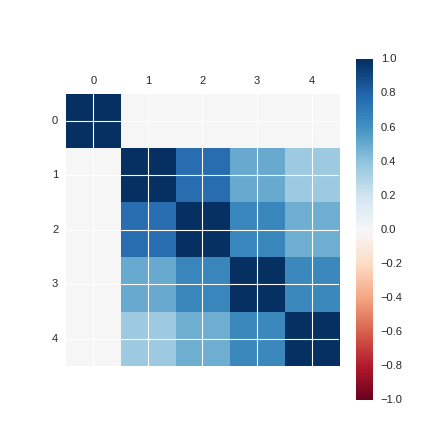

0    accev_1
1    accev_2
2    accev_3
3    accev_4
4    accev_5
dtype: object

In [6]:
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=sub, r_names=['accev'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)